In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate lamda for Poisson distribution
def calculate_lamda(yij_prev, mu, alpha):
    return (mu /yij_prev ) ** (1-alpha)

# Function to generate sample paths
def generate_sample_paths(num_generations, initial_values, mu, alpha):
    num_populations = len(initial_values)
    sample_paths = np.zeros((num_populations, num_generations))
    sample_paths[:, 0] = initial_values
    
    for j in range(1, num_generations):
        for i in range(num_populations):

            yij_prev = sample_paths[i, j-1] 
            # print(yij_prev)

            Zk = np.random.poisson(calculate_lamda(yij_prev, mu[i], alpha), size = round(yij_prev))

            yij =  np.sum(Zk) 
            sample_paths[i, j] = yij
    
    return sample_paths


def simulate_and_plot(num_generations, initial_values, mu, alpha):

    # Generate sample paths
    sample_paths = generate_sample_paths(num_generations,initial_values, mu, alpha)

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(len(initial_values)):
        plt.plot(sample_paths[i, :], label=f'Population {i + 1}')
        plt.axhline(y=np.average(sample_paths[i, :]), color='grey', linestyle='--')

    plt.title(f'Sample Paths for a = {alpha}')
    plt.xlabel('Generation')
    plt.ylabel('Population Size')
    plt.legend(bbox_to_anchor=(1, 1))

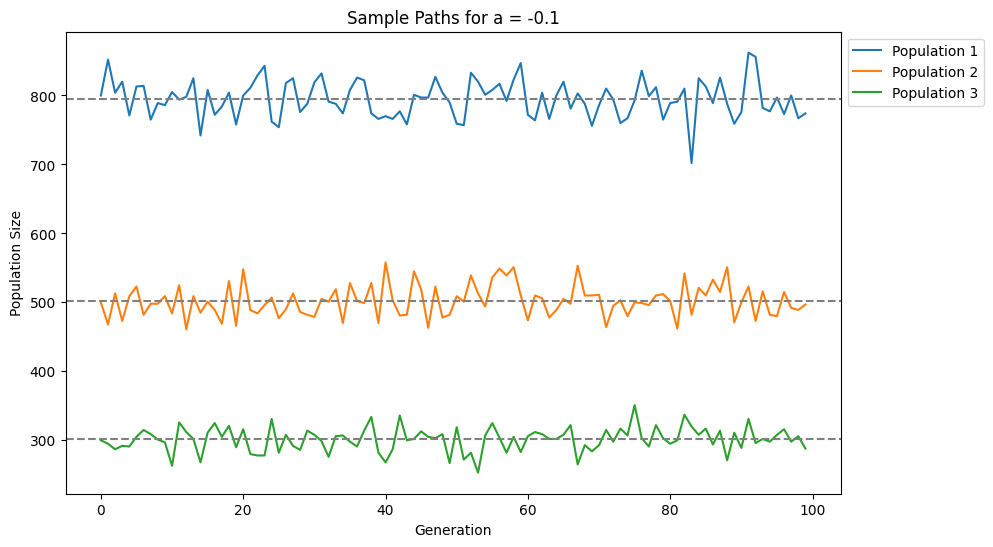

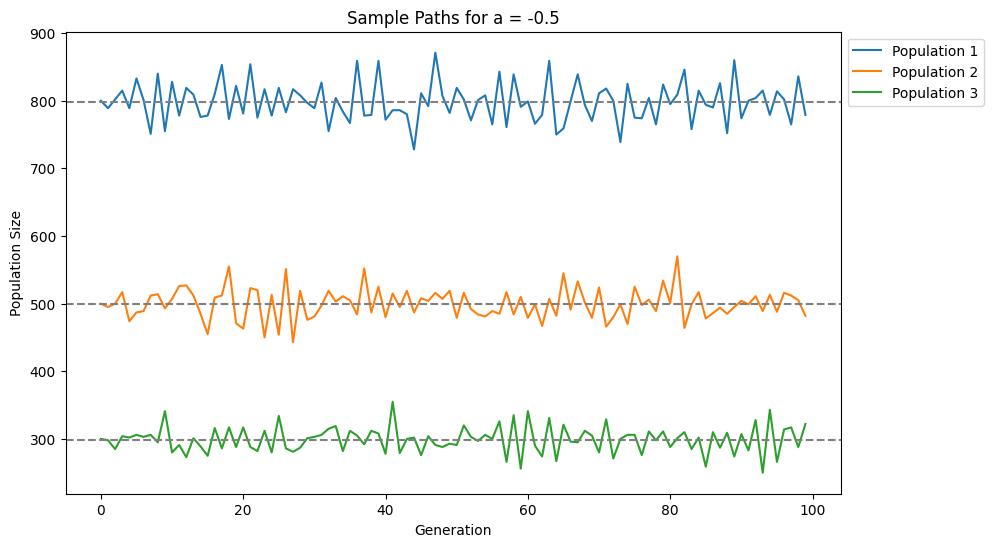

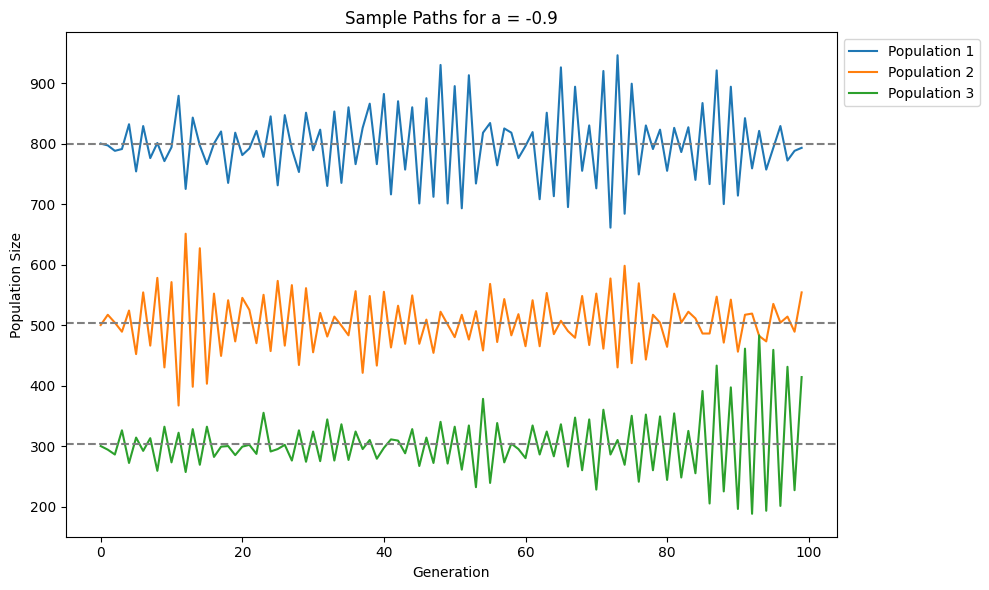

In [3]:

# Parameters  
num_generations = 100  # Number of generations

# Set initial values of population
initial_values = np.array([800, 500, 300])
mu = initial_values

# Parameter alpha
alpha_values = [-0.1,-0.5,-.9]



for alpha in alpha_values:
    simulate_and_plot(num_generations, initial_values, mu, alpha)

plt.tight_layout()
plt.show()
